# UBS Data Fellowship Regression project by Karl Merisalu

## Importing libraries

In [309]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
# Suppressing depreciation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the dataset

In [310]:
# importing dataset
dataset = pd.read_csv('winemag-data_first150k.csv')

# making sure dataset is a dataframe
dataset = pd.DataFrame(dataset)

# looking at the header of the dataset
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [311]:
# Dropping unnecessary columns
dataset = dataset.drop(columns=["Unnamed: 0", 'description', 'designation', 'region_1', 'region_2', 'winery', 'province', 'variety'])
dataset.head()

,country,points,price
0,US,96,235.0
1,Spain,96,110.0
2,US,96,90.0
3,US,96,65.0
4,France,95,66.0


## Information about each variable

In [312]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 3 columns):
country    150925 non-null object
points     150930 non-null int64
price      137235 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [313]:
dataset.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## Cleaning the dataset

In [314]:
dataset = dataset.dropna()
dataset.describe()

,points,price
count,137230.000000,137230.000000
mean,87.788035,33.132019
std,3.221572,36.323072
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## Points considerations

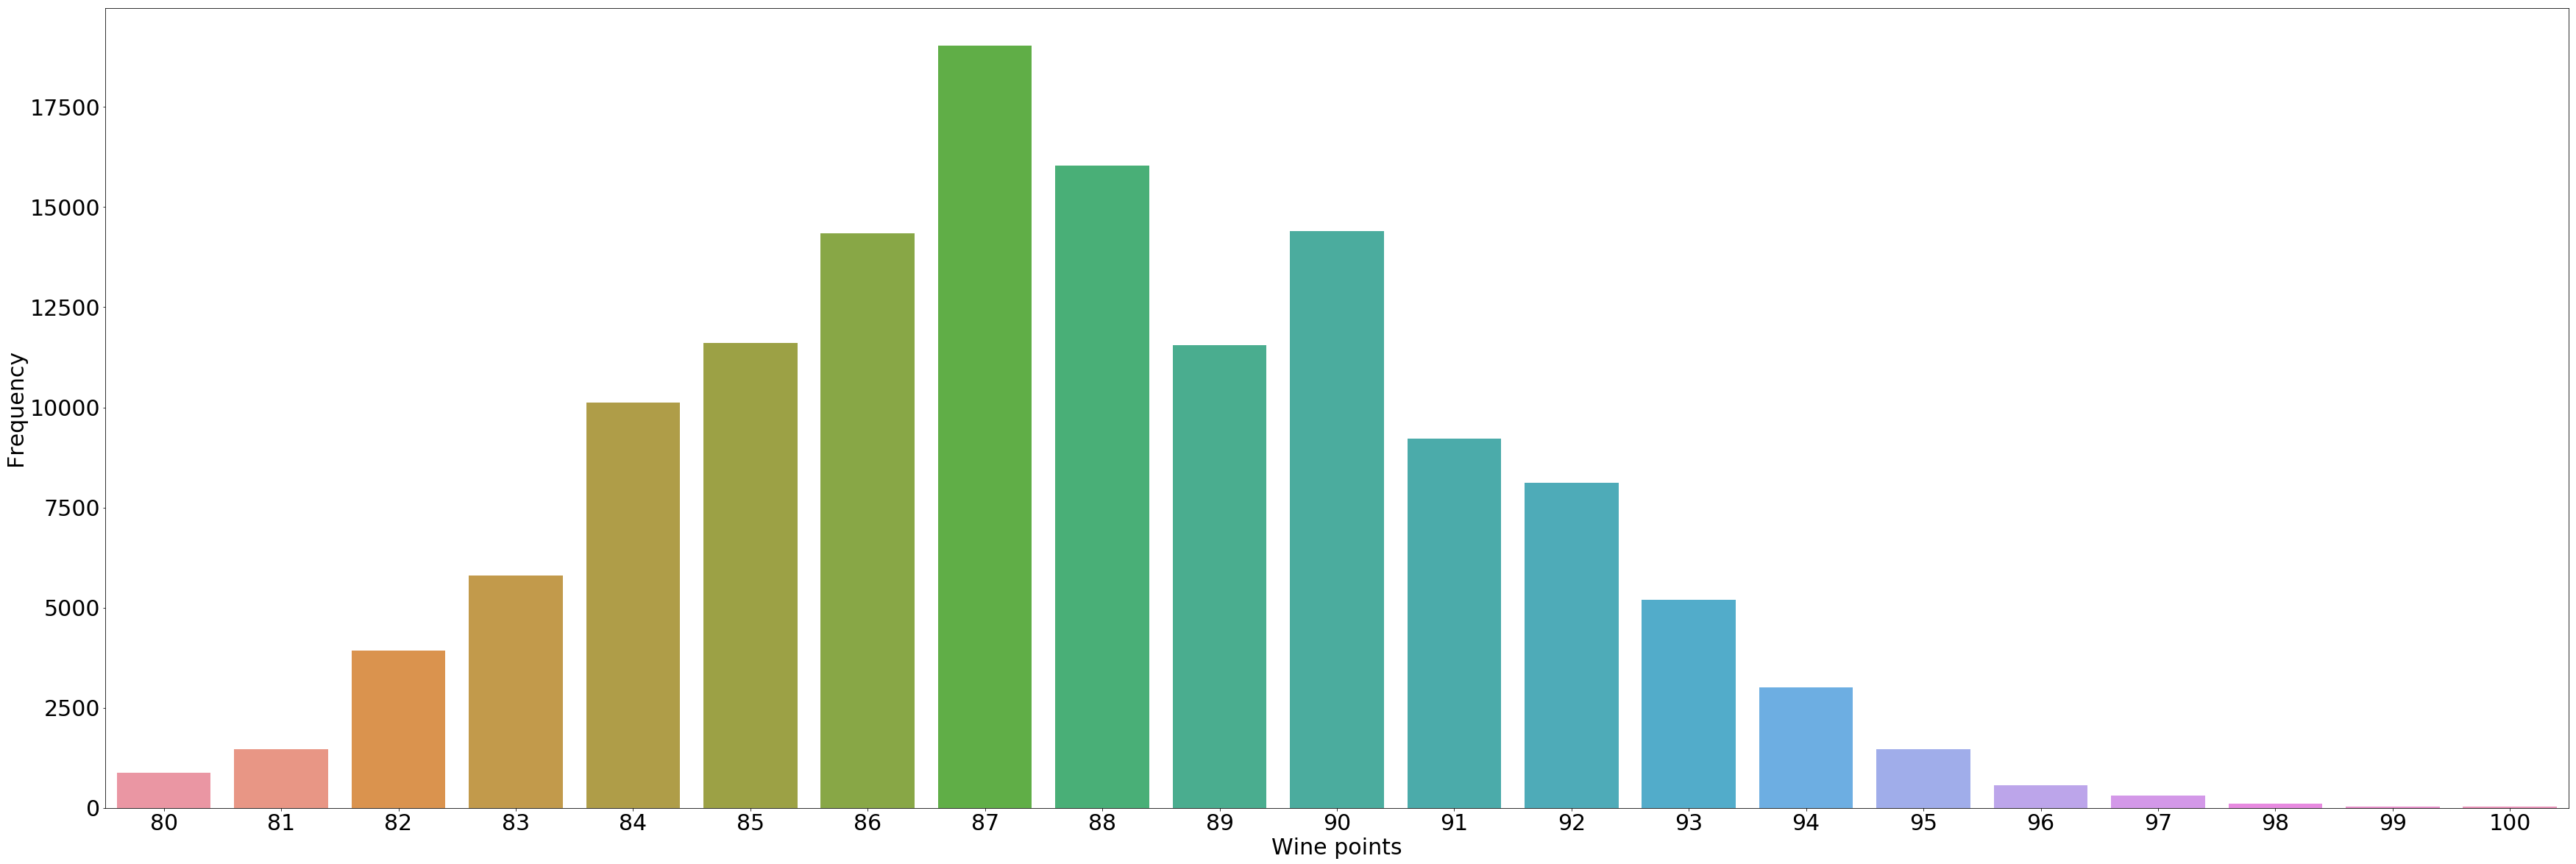

In [315]:
# going to see the histogram for points

chart1 = sns.countplot(x='points', data=dataset)
chart1.figure.set_size_inches(60,20)
chart1.set_xlabel("Wine points", fontsize=30)
chart1.set_ylabel("Frequency", fontsize=30)
chart1.tick_params(labelsize = 30)

## Getting dummy variables for countries

In [316]:
# creating a new dataset with dummy variables
dum_dataset = pd.get_dummies(dataset)
dum_dataset.head()

,points,price,country_Albania,country_Argentina,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,...,country_Slovenia,country_South Africa,country_South Korea,country_Spain,country_Switzerland,country_Turkey,country_US,country_US-France,country_Ukraine,country_Uruguay
0,96,235.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,96,110.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,96,90.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,96,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,95,66.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [317]:
dum_dataset.rename(columns={'country_South Africa':'country_South_Africa', 'country_New Zealand':'country_New_Zealand'}, inplace=True)

## Correlation analysis

In [318]:
# as the dataset is huge, calculating correlation matrix first
cor_matrix = dum_dataset.corr()

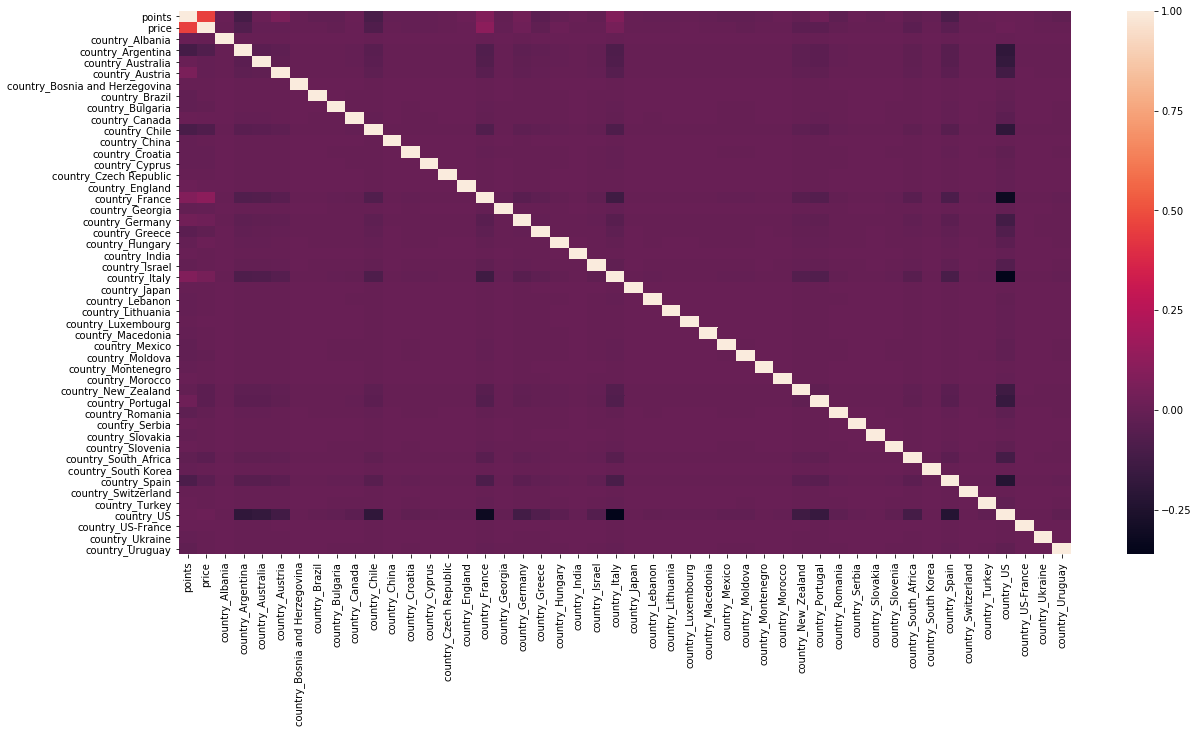

In [319]:
# plotting the matrix separately
plt.figure(figsize=(20, 10))
sns.heatmap(cor_matrix)

## Multivariate linear regression

In [320]:
dum_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 48 columns):
points                            137230 non-null int64
price                             137230 non-null float64
country_Albania                   137230 non-null uint8
country_Argentina                 137230 non-null uint8
country_Australia                 137230 non-null uint8
country_Austria                   137230 non-null uint8
country_Bosnia and Herzegovina    137230 non-null uint8
country_Brazil                    137230 non-null uint8
country_Bulgaria                  137230 non-null uint8
country_Canada                    137230 non-null uint8
country_Chile                     137230 non-null uint8
country_China                     137230 non-null uint8
country_Croatia                   137230 non-null uint8
country_Cyprus                    137230 non-null uint8
country_Czech Republic            137230 non-null uint8
country_England                   137230 non-nu

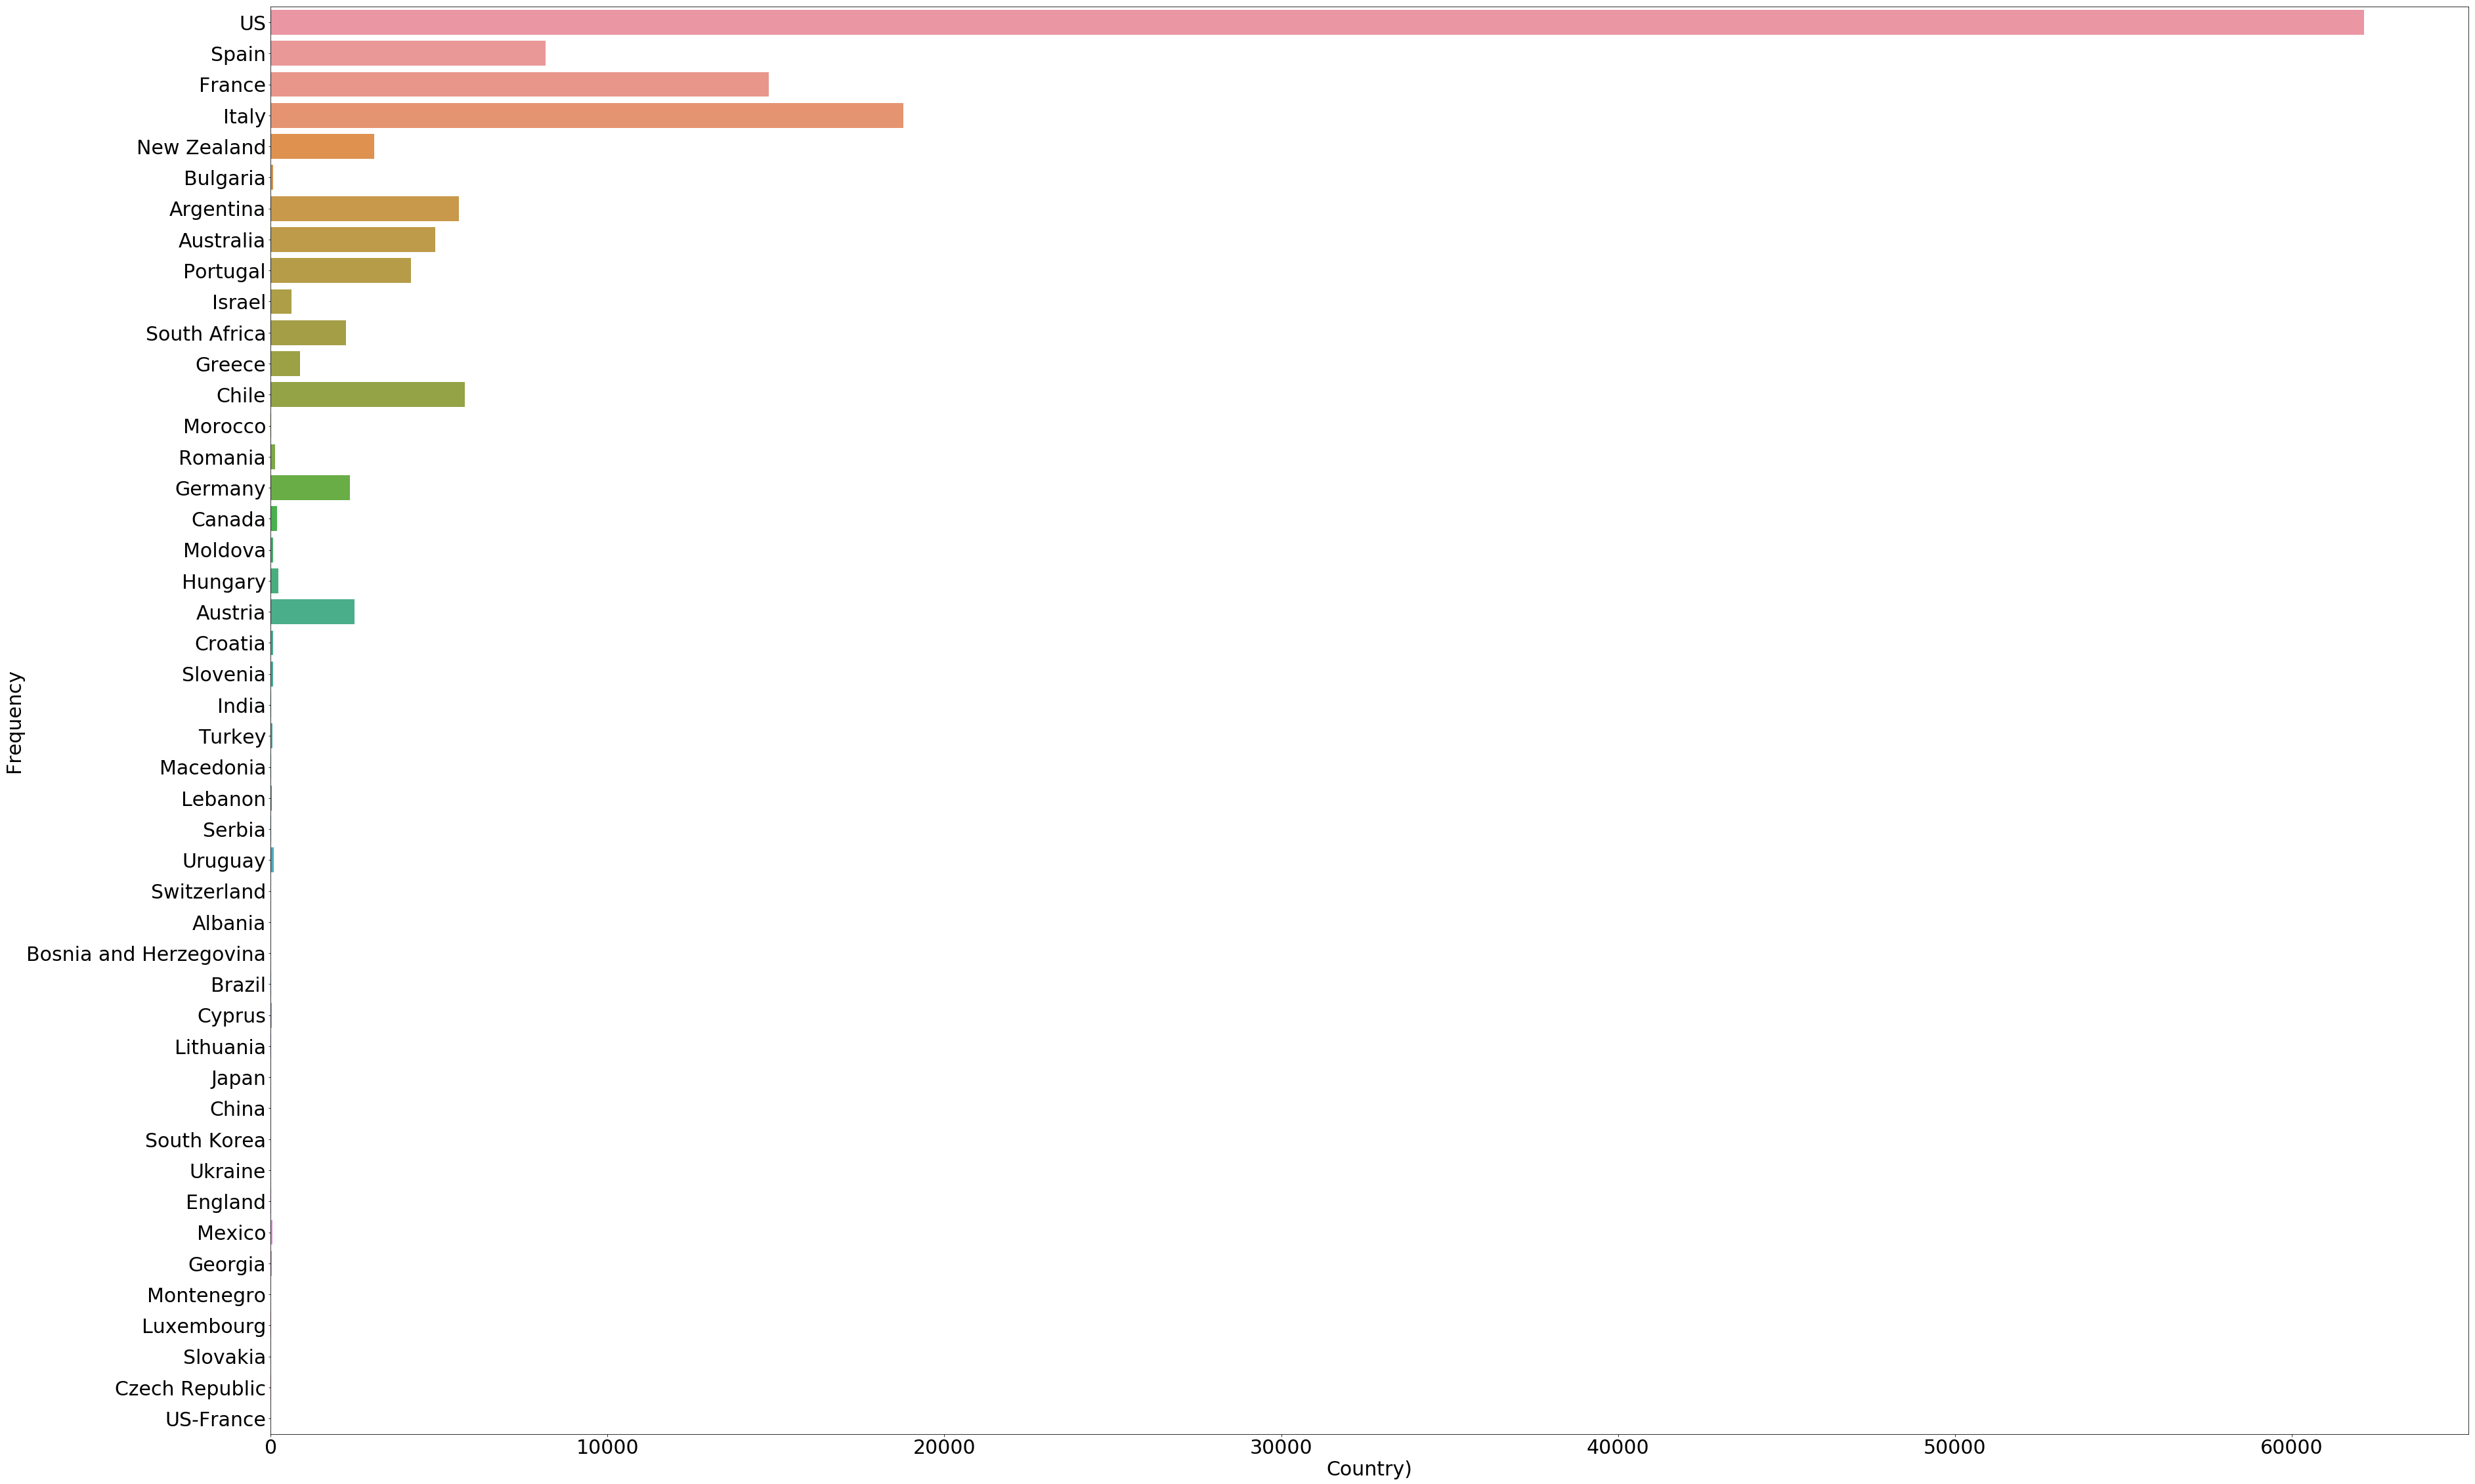

In [321]:
chart2 = sns.countplot(y='country', data=dataset)
chart2.figure.set_size_inches(60,40)
chart2.set_xlabel("Country)", fontsize=30)
chart2.set_ylabel("Frequency", fontsize=30)
chart2.tick_params(labelsize = 30)
plt.show()

In [322]:
# creating subsets for multivariate model

X = dum_dataset[['price', 
'country_Argentina', 
'country_Australia',               
'country_Israel',                                    
'country_Chile',                                            
'country_France',                  
'country_Austria',                
'country_Germany',               
'country_Greece',                               
'country_Italy',                               
'country_New_Zealand',           
'country_Portugal',                             
'country_South_Africa',                      
'country_Spain',                                     
'country_US']]
y = dum_dataset[['points']]
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [323]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(102922, 15) (102922, 1)
(34308, 15) (34308, 1)


In [324]:
# Creating linear regression object
regression_model = linear_model.LinearRegression()

# Training the model using the training sets
regression_model = regression_model.fit(X_train, y_train)

In [325]:
# The R-squared
print('The R-squared is:', regression_model.score(X_train, y_train))

The R-squared is: 0.23513538247606047


In [326]:
# The coefficients
print('Coefficients: \n', regression_model.coef_)

Coefficients: 
 [[ 0.03806981 -0.14948451  1.37488429  0.70104543  0.23897734  1.52860209
   2.68100791  1.79599981 -0.064646    1.68478557  1.2666642   1.81243892
   1.06109565  0.28040295  1.20173291]]


In [327]:
# The intercept
print('Intercept: \n', regression_model.intercept_)

Intercept: 
 [85.33156537]


In [328]:
y_pred = regression_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

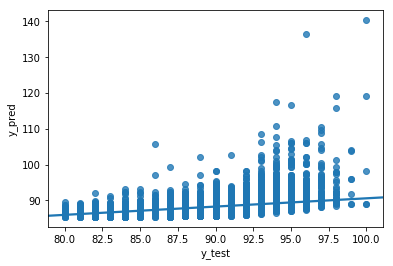

In [329]:
y_test = y_test['points'].reset_index()
y_obs_pred = pd.concat([y_test['points'], y_pred], axis=1)
y_obs_pred.columns = ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r = sns.regplot(x='y_test', y = 'y_pred', data=y_obs_pred)

In [330]:
# Running the same regression in statsmodel

Train = pd.concat([X_train, y_train], axis=1)
Formula = 'points ~ price + country_Argentina + country_Australia + country_Israel + country_Chile + country_France + country_Austria + country_Germany + country_Greece + country_Italy + country_New_Zealand + country_Portugal + country_South_Africa + country_Spain + country_US'
regression_model = smf.ols(Formula, data = Train).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2109.
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:16:19   Log-Likelihood:            -2.5271e+05
No. Observations:              102922   AIC:                         5.054e+05
Df Residuals:                  102906   BIC:                         5.056e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               85.3316 

In [331]:
# Removing country Greece, Chile and Argentina due to high p-values

Train = pd.concat([X_train, y_train], axis=1)
Formula = 'points ~ price + country_Australia + country_Israel + country_France + country_Austria + country_Germany + country_Italy + country_New_Zealand + country_Portugal + country_South_Africa + country_Spain + country_US'
regression_model = smf.ols(Formula, data = Train).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2632.
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:16:20   Log-Likelihood:            -2.5273e+05
No. Observations:              102922   AIC:                         5.055e+05
Df Residuals:                  102909   BIC:                         5.056e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               85.3687 

In [332]:
y_pred = regression_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

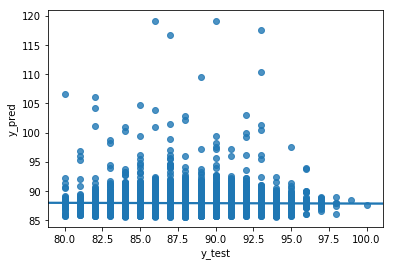

In [333]:
# comparing model prediction to actual numbers in a scatterplot

y_test = y_test['points'].reset_index()
y_obs_pred = pd.concat([y_test['points'], y_pred], axis=1)
y_obs_pred.columns = ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r = sns.regplot(x='y_test', y = 'y_pred', data=y_obs_pred)

# Summary Conclusion:

## Given available data I have built a model analysing wine price and its country of origin's effect on wine rating (points). The model explains 23.5% (R^2) of wine rating results. 

## From the results it can be concluded that there is a positive correlation between the rating of the wine (points) and the price of the wine. On average, +1USD in wine price adds 0.0381 points to the wine rating.

## Given available data, we could also model the effect of wine origin country to wine rating. Everything else constant, wines originating from Austria add the most points (2.6443) to wine rating and wines originating from Spain add the least points (0.2436) to wine rating.

## This means that pricey Austrian wines have the highest likelyhood of being highly rated and cheap Spanish wines have the highest likelyhood of having low ratings.

## This analysis is meant to show the process of regression analysis. It is limited by available data and could be definitely improved by having additional data on the specifics of wine eg. acidity, sugar amount, etc. 